In [1]:
## Python
import os
import random
import sys


## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)


## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3
# % pylab inline

Using TensorFlow backend.


In [2]:
from scipy.fftpack import dct
from scipy.stats import zscore
from math import sqrt

In [3]:
# Data Directory
# Please edit according to your directory change.
dir_list = os.listdir('sessions/')
dir_list.sort()
dir_list.remove('.DS_Store')
#print (dir_list)

In [7]:
x = [0,0.3,0.5,0.75,1.0]
y1 = [60,59.8,61.1,60.4,58.4] #activation U
y11 = [60,60,60,60,60]
y2 = [51.2,51,52,51.8,50.8] #valence 
y22=[51.2,51.2,51.2,51.2,51.2]
y3 = [51.5,51.1,51.7,51.8,51] # emotion
y33 = [51.5,51.5,51.5,51.5,51.5]

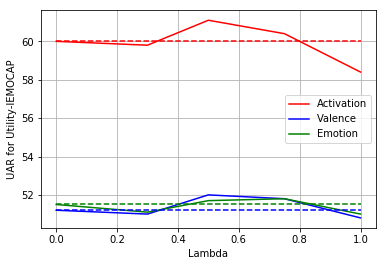

In [10]:
plt.xlabel('Lambda')
plt.ylabel('UAR for Utility-IEMOCAP')
act, =plt.plot(x, y1, 'r',label = 'Activation')
val, = plt.plot(x, y2, 'b',label = 'Valence')
emo, = plt.plot(x, y3, 'g',label = 'Emotion')
plt.plot(x,y11,'r--')
plt.plot(x,y22,'b--')
plt.plot(x,y33,'g--')
plt.legend(handles=[act, val,emo])
plt.grid(True)
plt.show()

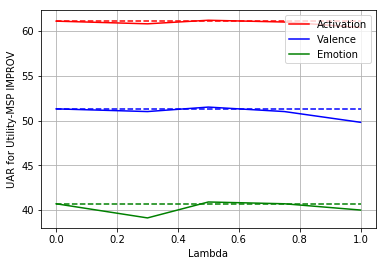

In [12]:
y1 = [61.1,60.8,61.2,61,60.4 ]
y2 = [51.3,51,51.5,51,49.8]
y3 = [40.7,39.12,40.9,40.7,40]
y11 = [61.1,61.1,61.1,61.1,61.1]
y22 = [51.3,51.3,51.3,51.3,51.3]
y33 = [40.7,40.7,40.7,40.7,40.7]
plt.xlabel('Lambda')
plt.ylabel('UAR for Utility-MSP IMPROV')
act, =plt.plot(x, y1, 'r',label = 'Activation')
val, = plt.plot(x, y2, 'b',label = 'Valence')
emo, = plt.plot(x, y3, 'g',label = 'Emotion')
plt.plot(x,y11,'r--')
plt.plot(x,y22,'b--')
plt.plot(x,y33,'g--')
plt.legend(handles=[act, val,emo])
plt.grid(True)
plt.show()

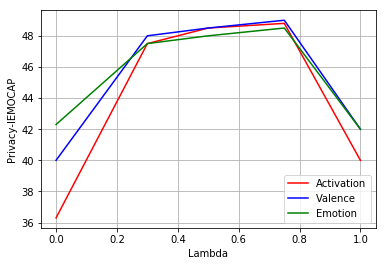

In [15]:
y1 = [36.3,47.5,48.5,48.8,40]
y2 = [40,48,48.5,49,42]
y3 = [42.3,47.5,48,48.5,42]
plt.xlabel('Lambda')
plt.ylabel('Privacy-IEMOCAP')
act, =plt.plot(x, y1, 'r',label = 'Activation')
val, = plt.plot(x, y2, 'b',label = 'Valence')
emo, = plt.plot(x, y3, 'g',label = 'Emotion')
plt.legend(handles=[act, val,emo])
plt.grid(True)
plt.show()

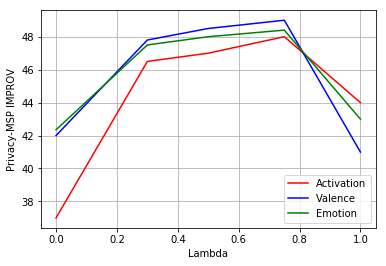

In [16]:
y1 = [37,46.5,47,48,44]
y2 = [42,47.8,48.5,49,41]
y3 = [42.35,47.5,48,48.4,43]
plt.xlabel('Lambda')
plt.ylabel('Privacy-MSP IMPROV')
act, =plt.plot(x, y1, 'r',label = 'Activation')
val, = plt.plot(x, y2, 'b',label = 'Valence')
emo, = plt.plot(x, y3, 'g',label = 'Emotion')
plt.legend(handles=[act, val,emo])
plt.grid(True)
plt.show()

In [6]:
f = np.linspace(0.0, 10000.0, num=10001)
m=1127*np.log(1+f/700)
m

array([0.00000000e+00, 1.60885109e+00, 3.21540874e+00, ...,
       3.07302668e+03, 3.07313203e+03, 3.07323736e+03])

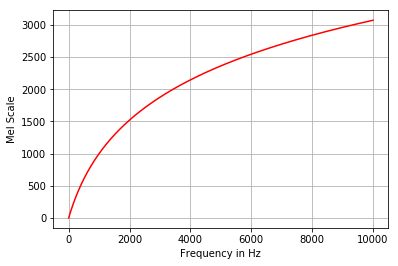

In [7]:
plt.plot(f,m,'r')
plt.xlabel('Frequency in Hz')
plt.ylabel('Mel Scale')
plt.grid(True)
plt.show()

In [24]:
len(dir_list)

6

In [9]:
test_df = pd.DataFrame(columns=['path', 'file_name'])
count = 0
for f in dir_list:
    if (f!='.DS_Store'):
        session = os.listdir('sessions/' + f) #list of directories within speech files
        session.sort()
    #session.remove('.DS_Store')
    for g in session:
        if (g!='.DS_Store'):
            sentence = os.listdir('sessions/' + f +'/' + g ) #list of directories within speech files
            sentence.sort()
        #sentence.remove('.DS_Store')
        for h in sentence:
            if (h!='.DS_Store' and g!='.DS_Store'):
                setting = os.listdir('sessions/' + f +'/' + g + '/' + h) #list of directories within speech files
                setting.sort()
            #setting.remove('.DS_Store')
            for i in setting:
                if (i!='.DS_Store'and h!='.DS_Store' and g!='.DS_Store'):
                    path = 'sessions/' + f + '/' + g + '/' + h + '/'+ i
                    f_name = i
                    test_df.loc[count] = [path,f_name]
                    count+=1

In [10]:
test_df= test_df.sort_values(by=['file_name']).reset_index(drop=True)
test_df


,path,file_name
0,sessions/session1/S01A/P/MSP-IMPROV-S01A-F01-P...,MSP-IMPROV-S01A-F01-P-FM01.wav
1,sessions/session1/S01A/P/MSP-IMPROV-S01A-F01-P...,MSP-IMPROV-S01A-F01-P-FM02.wav
2,sessions/session1/S01A/P/MSP-IMPROV-S01A-F01-P...,MSP-IMPROV-S01A-F01-P-MF01.wav
3,sessions/session1/S01A/S/MSP-IMPROV-S01A-F01-S...,MSP-IMPROV-S01A-F01-S-FM01.wav
4,sessions/session1/S01A/S/MSP-IMPROV-S01A-F01-S...,MSP-IMPROV-S01A-F01-S-FM02.wav
...,...,...
8433,sessions/session5/S20S/R/MSP-IMPROV-S20S-F05-R...,MSP-IMPROV-S20S-F05-R-FF01.wav
8434,sessions/session6/S20S/R/MSP-IMPROV-S20S-F06-R...,MSP-IMPROV-S20S-F06-R-FF01.wav
8435,sessions/session1/S20S/R/MSP-IMPROV-S20S-M01-R...,MSP-IMPROV-S20S-M01-R-MM01.wav
8436,sessions/session2/S20S/R/MSP-IMPROV-S20S-M02-R...,MSP-IMPROV-S20S-M02-R-MM01.wav


In [54]:
emo_df = pd.DataFrame(columns=['file','emotion','act','val','dom','nat','more'])
emotions = [' A',' H',' N',' S',' X', ' O']

count = 0
df = pd.read_table('Evalution.txt', names = ['file','emotion','act','val','dom','nat','more'],
                   delimiter='\t',  index_col=False, skip_blank_lines= True, na_filter = True )



In [55]:
emo_df = emo_df.append(df.loc[df['emotion'].isin(emotions)])

In [56]:
len(emo_df)

8438

In [57]:
emo_df

,file,emotion,act,val,dom,nat,more
0,UTD-IMPROV-S01A-F02-R-FF01.avi,A,A:3.333333,V:2.333333,D:3.000000,N:3.666667,NaN
8,UTD-IMPROV-S01A-F03-R-FF01.avi,A,A:3.000000,V:1.428571,D:4.285714,N:3.285714,NaN
17,UTD-IMPROV-S01A-F05-R-FF01.avi,A,A:2.400000,V:1.600000,D:3.600000,N:3.600000,NaN
24,UTD-IMPROV-S01A-F06-R-FF01.avi,A,A:2.800000,V:2.000000,D:3.200000,N:2.600000,NaN
31,UTD-IMPROV-S01A-M01-R-MM01.avi,A,A:2.333333,V:1.666667,D:3.500000,N:3.166667,NaN
...,...,...,...,...,...,...,...
78519,UTD-IMPROV-S15S-M06-S-MF04.avi,S,A:2.500000,V:1.333333,D:3.500000,N:3.000000,NaN
78527,UTD-IMPROV-S15S-M06-S-MF05.avi,S,A:2.200000,V:1.200000,D:3.800000,N:3.600000,NaN
78534,UTD-IMPROV-S15S-M06-S-MF06.avi,S,A:3.428571,V:1.142857,D:3.285714,N:3.571429,NaN
78543,UTD-IMPROV-S15S-M06-S-MF07.avi,S,A:3.600000,V:1.800000,D:3.200000,N:3.600000,NaN


In [58]:
emo_df = emo_df.sort_values(by=['file']).reset_index(drop=True)
emo_df

,file,emotion,act,val,dom,nat,more
0,UTD-IMPROV-S01A-F01-P-FM01.avi,N,A:4.000000,V:2.800000,D:2.800000,N:3.200000,NaN
1,UTD-IMPROV-S01A-F01-P-FM02.avi,H,A:2.833333,V:4.500000,D:3.333333,N:4.500000,NaN
2,UTD-IMPROV-S01A-F01-P-MF01.avi,H,A:3.500000,V:2.700000,D:3.000000,N:3.400000,NaN
3,UTD-IMPROV-S01A-F01-S-FM01.avi,S,A:3.600000,V:2.400000,D:3.000000,N:3.600000,NaN
4,UTD-IMPROV-S01A-F01-S-FM02.avi,A,A:2.800000,V:2.000000,D:3.200000,N:4.200000,NaN
...,...,...,...,...,...,...,...
8433,UTD-IMPROV-S20S-F05-R-FF01.avi,S,A:3.000000,V:1.400000,D:2.000000,N:2.000000,NaN
8434,UTD-IMPROV-S20S-F06-R-FF01.avi,S,A:4.285714,V:1.857143,D:2.857143,N:3.142857,NaN
8435,UTD-IMPROV-S20S-M01-R-MM01.avi,X,A:2.166667,V:1.833333,D:3.166667,N:2.666667,NaN
8436,UTD-IMPROV-S20S-M02-R-MM01.avi,N,A:4.142857,V:2.571429,D:2.142857,N:2.714286,NaN


In [59]:
result = pd.concat([test_df, emo_df], axis=1, sort=False)

In [ ]:
result

In [61]:
count=0
for i in range(len(result)):
    if(result['file_name'][i][4:-4]==result['file'][i][4:-4]):
        count=0
    else:
        count+=1
count

0

In [62]:
data_df = result.drop(['file_name','file','dom','nat','more'],axis=1)

In [64]:
data_df['path'][2][-14:-11]

'F01'

In [65]:
gender=[]
actor=[]
for i in range(len(data_df)):
    gender.append(data_df['path'][i][-14])
    actor.append(data_df['path'][i][-14:-11])
    activation = float(data_df.at[i,'act'][3:])
    valence = float(data_df.at[i,'val'][3:])
    if (valence>=1 and valence<=2.75):
        valence = 'low'
    elif (valence<=3.25):
        valence='mid'
    else:
        valence='high'
    if (activation>=1 and activation<=2.75):
        activation = 'low'
    elif (activation<=3.25):
        activation='mid'
    else:
        activation='high'
    data_df['val'][i]=valence
    data_df['act'][i]=activation
data_df['gender']=gender
data_df['actor']=actor
data_df

,path,emotion,act,val,gender,actor
0,sessions/session1/S01A/P/MSP-IMPROV-S01A-F01-P...,N,high,mid,F,F01
1,sessions/session1/S01A/P/MSP-IMPROV-S01A-F01-P...,H,mid,high,F,F01
2,sessions/session1/S01A/P/MSP-IMPROV-S01A-F01-P...,H,high,low,F,F01
3,sessions/session1/S01A/S/MSP-IMPROV-S01A-F01-S...,S,high,low,F,F01
4,sessions/session1/S01A/S/MSP-IMPROV-S01A-F01-S...,A,mid,low,F,F01
...,...,...,...,...,...,...
8433,sessions/session5/S20S/R/MSP-IMPROV-S20S-F05-R...,S,mid,low,F,F05
8434,sessions/session6/S20S/R/MSP-IMPROV-S20S-F06-R...,S,high,low,F,F06
8435,sessions/session1/S20S/R/MSP-IMPROV-S20S-M01-R...,X,low,low,M,M01
8436,sessions/session2/S20S/R/MSP-IMPROV-S20S-M02-R...,N,high,low,M,M02


In [66]:
data_df.groupby('val').count()

,path,emotion,act,gender,actor
val,,,,,
high,3301,3301,3301,3301,3301
low,2915,2915,2915,2915,2915
mid,2222,2222,2222,2222,2222


In [67]:
data_df.groupby('act').count()

,path,emotion,val,gender,actor
act,,,,,
high,5370,5370,5370,5370,5370
low,1362,1362,1362,1362,1362
mid,1706,1706,1706,1706,1706


In [68]:
grouped = data_df.groupby(['emotion', 'gender'])

In [69]:
#number of actors
len(np.unique(data_df.actor)) 

12

In [28]:
scipy_sampling_rate, scipy_load = wavfile.read(filename)
scipy_sampling_rate, scipy_load

(16000, array([ 161,  197,   37, ..., -455, -470, -465], dtype=int16))

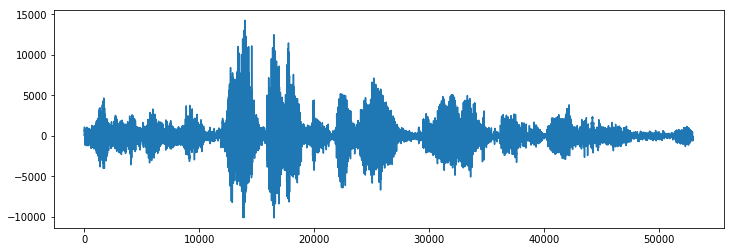

In [89]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_load)

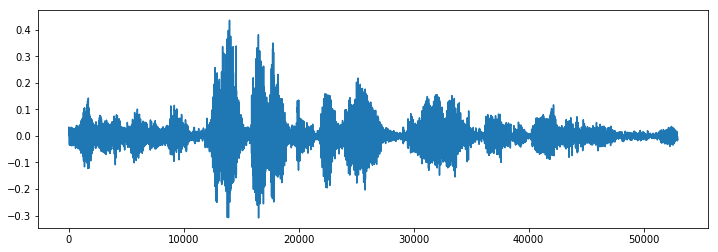

In [90]:
plt.figure(figsize=(12, 4))
plt.plot(samples)

In [12]:
#dataframe to store MFB 
data = pd.DataFrame(columns=['MFB_var'])

In [ ]:
'''def preemphasis(signal,coeff):
    return numpy.append(signal[0],signal[1:]-signal[:-1]*coeff)

In [142]:
y, sr = librosa.load(data_df.path[2], sr=sample_rate)
melSpec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,n_fft=1103, hop_length=441, 
                                         htk=False)
melSpec_dB = librosa.power_to_db(melSpec, ref=np.max)

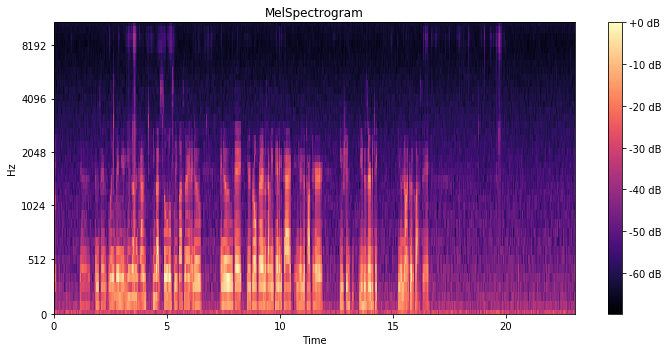

In [143]:
#logfb = librosa.power_to_db(mfb, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(melSpec_dB, x_axis='time', y_axis='mel', sr=sample_rate, fmax=None)
plt.colorbar(format='%+1.0f dB')
plt.title("MelSpectrogram")
plt.tight_layout()
plt.show()

In [116]:
sample_rate, signal = wavfile.read(data_df.path[2])
import python_speech_features
from python_speech_features import fbank
from python_speech_features import logfbank
sample_rate
 #doubts - fmin, preemph or not?, log output?

44100

In [159]:
mfb = fbank(signal, samplerate=sample_rate, winlen=0.025, winstep=0.01,
      nfilt=40, nfft=1103,lowfreq=0,highfreq=None,preemph=0.95)
mfb = mfb[0]

In [160]:
logfb = logfbank(y, samplerate=sample_rate, winlen=0.025, winstep=0.01,
      nfilt=40, nfft=1103,lowfreq=0,highfreq=None,preemph=0.95) #doubts - fmin, preemph or not?, log output?

In [161]:
logfb = logfb.T
mfb = mfb.T

In [162]:
mfb.shape

(40, 1984)

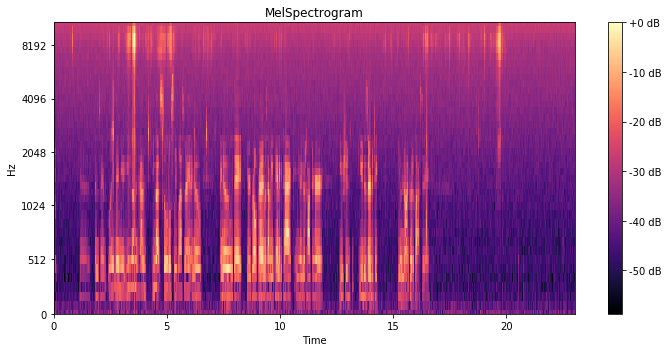

In [163]:
plt.figure(figsize=(10, 5))
melSpec_dB = librosa.power_to_db(mfb, ref=np.max)
librosa.display.specshow(melSpec_dB, x_axis='time', y_axis='mel', sr=sample_rate, fmax=None)
plt.colorbar(format='%+1.0f dB')
plt.title("MelSpectrogram")
plt.tight_layout()
plt.show()

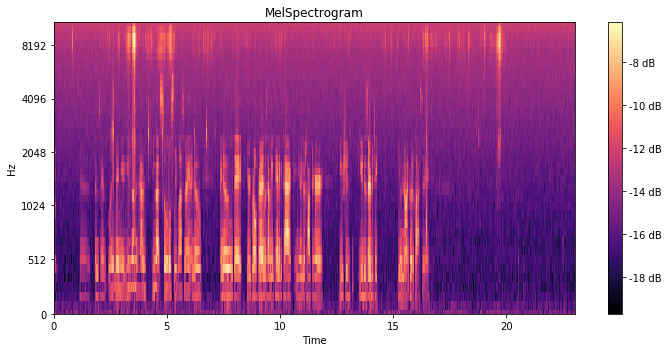

In [164]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(logfb, x_axis='time', y_axis='mel', sr=sample_rate, fmax=None)
plt.colorbar(format='%+1.0f dB')
plt.title("MelSpectrogram")
plt.tight_layout()
plt.show()

In [ ]:
#list of audio samples 
audio_samples = []
srate = []
for i in tqdm(range(len(data_df))):
    sample_rate, samples = wavfile.read(data_df.path[i])
    audio_samples.append(samples)
    srate.append(sample_rate)

In [299]:
np.unique(srate)

array([16000])

In [300]:
sample_lengths = []

In [301]:
for i in tqdm(range(len(audio_samples))):
    sample_lengths.append(len(audio_samples[i]))

100%|██████████| 10039/10039 [00:00<00:00, 41705.08it/s]


In [225]:
pad = int(round(np.percentile(sample_lengths,50)))

In [226]:
pad

56319

In [302]:
pad = int(np.nanmean(sample_lengths))

In [228]:
np.std(sample_lengths)

49032.372366776

In [25]:
type(audio_samples[0][0])

numpy.int16

In [167]:
int(np.ceil(sample_rate*0.025))

1103

In [168]:
#MFB energies through python_speech_features
logfbs =[]
mfbs = []
n_fft = int(np.ceil(sample_rate * 0.025))
import python_speech_features
from python_speech_features import fbank
from python_speech_features import logfbank
for i in tqdm(range(len(data_df))):
    sample_rate, signal = wavfile.read(data_df.path[i])
    lfbanks = logfbank(signal, samplerate = sample_rate, winlen=0.025, winstep=0.01,
                  nfilt=40, nfft = n_fft,lowfreq = 0,highfreq=None,preemph=0.97)
    fbanks = fbank(signal, samplerate=sample_rate, winlen=0.025, winstep=0.01,
                  nfilt=40, nfft=n_fft,lowfreq=0,highfreq=None,preemph=0.97)
    fbanks = fbanks[0]
    logfbs.append(lfbanks)
    mfbs.append(fbanks)

100%|██████████| 8438/8438 [13:42<00:00, 10.26it/s]


In [169]:
data_df['logfb'] = logfbs
data_df['mfb']=mfbs
#data_df['MFB_eq']=data['MFB_eq']

In [170]:
data_df = data_df.sort_values('actor')

In [171]:
data_df=data_df.reset_index(drop=True)

In [172]:
data_df

,path,emotion,act,val,gender,actor,logfb,mfb
0,sessions/session1/S01A/P/MSP-IMPROV-S01A-F01-P...,N,high,mid,F,F01,"[[5.763972523449607, 5.154867146080473, 4.7190...","[[318.61150994311043, 173.27278526100173, 112...."
1,sessions/session1/S09A/P/MSP-IMPROV-S09A-F01-P...,N,high,mid,F,F01,"[[5.972623702998547, 4.460923569003736, 6.3071...","[[392.5342140582388, 86.5674231763443, 548.464..."
2,sessions/session1/S09A/P/MSP-IMPROV-S09A-F01-P...,H,low,high,F,F01,"[[5.249642302049589, 4.263761902267779, 3.9609...","[[190.49811548480102, 71.07686536871358, 52.50..."
3,sessions/session1/S08S/T/MSP-IMPROV-S08S-F01-T...,S,mid,low,F,F01,"[[6.212727126089201, 3.5862948743882566, 2.715...","[[499.0603977934128, 36.10007252675696, 15.112..."
4,sessions/session1/S08S/S/MSP-IMPROV-S08S-F01-S...,N,high,low,F,F01,"[[4.674193496609284, 5.718914943537799, 4.6544...","[[107.1461185283053, 304.5742633245244, 105.05..."
...,...,...,...,...,...,...,...,...
8433,sessions/session6/S02S/S/MSP-IMPROV-S02S-M06-S...,S,high,low,M,M06,"[[11.223406184442121, 9.751920898876335, 8.849...","[[74862.33589180312, 17187.212016696238, 6968...."
8434,sessions/session6/S02S/S/MSP-IMPROV-S02S-M06-S...,S,mid,low,M,M06,"[[11.210409111908252, 8.778762824256022, 8.280...","[[73895.6403960265, 6494.836946054574, 3945.46..."
8435,sessions/session6/S02S/S/MSP-IMPROV-S02S-M06-S...,X,high,low,M,M06,"[[11.508779361480546, 9.847465799700664, 9.324...","[[99586.2479730986, 18910.371359137087, 11208...."
8436,sessions/session6/S09A/S/MSP-IMPROV-S09A-M06-S...,X,low,low,M,M06,"[[10.40188023513336, 9.788071356187462, 6.5760...","[[32921.46761758348, 17819.90475525316, 717.71..."


In [18]:
actor_groupby = data_df.groupby(['actor'])

In [309]:
actor_groupby.count()

,path,gender,emotion,valence,activation,valence1,activation1,MFB_var,MFB_eq
actor,,,,,,,,,
F01,873,873,873,873,873,873,873,873,873
F02,859,859,859,859,859,859,859,859,859
F03,1048,1048,1048,1048,1048,1048,1048,1048,1048
F04,987,987,987,987,987,987,987,987,987
F05,1033,1033,1033,1033,1033,1033,1033,1033,1033
M01,946,946,946,946,946,946,946,946,946
M02,952,952,952,952,952,952,952,952,952
M03,1088,1088,1088,1088,1088,1088,1088,1088,1088
M04,1116,1116,1116,1116,1116,1116,1116,1116,1116


In [19]:
number = actor_groupby.size()

In [38]:
number

actor
F01     873
F02     859
F03    1048
F04     987
F05    1033
M01     946
M02     952
M03    1088
M04    1116
M05    1137
dtype: int64

In [ ]:
#mean and std.dev by feature by actor
'''count = 0
k=0
means=[]
sds=[]
X=[]
for num in number:
    X=[]
    for i in range(num):
        for j in range(len(data_df['MFB'][i+k])):
            X.append(data_df['MFB'][i+k][j])
    print(i+k)
    mean = np.mean(X,axis=0)
    sd = np.std(X,axis=0)
    means.append(mean)
    sds.append(sd)
    k=num+k
    count+=1
        


In [47]:
#norm by feature by actor
'''count = 0
#data_norm = pd.DataFrame(columns=['norm'])
norm1 =[]
norm2 = []
k=0
for num in tqdm(number):
    for i in range(num):
        norm1=[]
        for j in range(len(data_df['MFB'][i+k])):
            x = data_df['MFB'][i+k][j]- means[count]
            y = np.divide(x,sds[count])
            norm1.append(y)
        norm2.append(norm1)
    count+=1
    k=num+i

100%|██████████| 10/10 [02:20<00:00, 14.01s/it]


In [110]:
#feature_mean_1 = actor_feature.MFB.apply(lambda x: np.mean(x,axis=1))

In [43]:
#mean and std.dev by actor 
count = 0 #keeps count of actor number
k=0 # keeps count of index number
mean_1=[] 
sd_1=[]
mean_2=[]
sd_2=[]
X=[] #list that has all frames belonging to one actor 
for num in number:
    Xv=[]
    Xe=[]
    for i in range(num):
        for j in range(len(data_df['MFB_var'][i+k])):
            Xv.append(data_df['MFB_var'][i+k][j])
        #for j in range(len(data_df['MFB_eq'][i+k])):
            #Xe.append(data_df['MFB_eq'][i+k][j])
    print(i+k)
    mean1 = np.mean(Xv)
    sdv1 = np.std(Xv)
    mean2 = np.mean(Xv, axis=0)
    sdv2 = np.std(Xv,axis=0 )
    #meane = np.mean(Xe)
    #sde = np.std(Xe)
    mean_1.append(mean1)
    sd_1.append(sdv1)
    mean_2.append(mean2)
    sd_2.append(sdv2)
    #mean_eq.append(meane)
    #sd_eq.append(sde)
    k=num+k
    count+=1
        

872
1731
2779
3766
4799
5745
6697
7785
8901
10038


In [45]:
mean_v=np.zeros((10,40))
sd_v=np.zeros((10,40))
#mean_e=np.zeros((10,40))
#sd_e=np.zeros((10,40))
for i in range(10):
    for j in range(40):
        mean_v[i][j]=mean_1[i]
        sd_v[i][j]=sd_1[i]
        #mean_e[i][j]=mean_eq[i]
        #sd_e[i][j]=sd_eq[i]

In [50]:
# normalise over actors
count = 0
#data_norm = pd.DataFrame(columns=['norm'])
norm2v =[]
norm2e = []
k=0
for num in tqdm(number):
    for i in range(num):
        norm1v=[]
        norm1e=[]
        for j in range(len(data_df['MFB_var'][i+k])):
            xv = data_df['MFB_var'][i+k][j]- mean_v[count]
            yv = np.divide(xv,sd_v[count])
            norm1v.append(yv)
      
            xe = data_df['MFB_var'][i+k][j]- mean_2[count]
            ye = np.divide(xe,sd_2[count])
            norm1e.append(ye)
        norm2v.append(norm1v)
        norm2e.append(norm1e)
    count+=1
    k=num+i

100%|██████████| 10/10 [04:46<00:00, 28.66s/it]


In [55]:
len(norm2e[0][0])

40

In [57]:
data_df['norm_var']=norm2v
data_df['norm_af']=norm2e

In [ ]:
data_df['norm_var'].to_pickle('norm_act.pkl')
data_df['norm_af'].to_pickle('norm_acfe.pkl')

In [345]:
# break up feature file in sets of 500..total 20 pkl files 
count=0
for i in range(20):
    if (i!=19):
        feat = data_df['norm_var'][count:count+500]
        feat.to_pickle('norm_var1%s.pkl'%(i+1))
    else:
        feat=data_df['norm_var'][count:10039]
        feat.to_pickle('norm_var1%s.pkl'%20)
    count+=500



In [83]:
# break up feature file in sets of 500..total 20 pkl files 
count=0
for i in range(20):
    if (i!=19):
        feat1 = data_df['norm_eq'][count:count+500]
        feat1.to_pickle('norm_eq%s.pkl'%(i+1))
    else:
        feat1=data_df['norm_eq'][count:10039]
        feat1.to_pickle('norm_eq%s.pkl'%20)
    count+=500



In [346]:
# break up feature file in sets of 500..total 20 pkl files 
count=0
for i in range(20):
    if (i!=19):
        feat1 = data_df['MFB_var'][count:count+500]
        feat1.to_pickle('MFB_psf%s.pkl'%(i+1))
    else:
        feat1=data_df['MFB_var'][count:10039]
        feat1.to_pickle('MFB_psf%s.pkl'%20)
    count+=500



In [ ]:
data_df.to_pickle('MSP_data.pkl')

In [86]:
# break up feature file in sets of 500..total 20 pkl files 
count=0
for i in range(20):
    if (i!=19):
        feat1 = data_df['MFB_eq'][count:count+500]
        feat1.to_pickle('MFB_eq%s.pkl'%(i+1))
    else:
        feat1=data_df['MFB_eq'][count:10039]
        feat1.to_pickle('MFB_eq%s.pkl'%20)
    count+=500

In [ ]:
'''count = 0
prev = 0
tot = np.zeros((689,40))
std = []
for num in number:
    for i in range(num):   #sqrt(mean(abs(x - x.mean())**2))
        tot += abs(data_df.MFB[i+prev]-feature_mean[count])**2
    std.append(np.sqrt((tot)/(num-1)))
    count+=1
    print(prev+i)
    prev = prev + num

In [164]:
'''count = 0
prev = 0
data_df['normalized'] = data_df['MFB']
for num in number:
    for i in range(num):   #sqrt(mean(abs(x - x.mean())**2))
        data_df['normalized'][i+prev] = (data_df.MFB[i+prev]-feature_mean[count])/std[count]
    count+=1
    prev = prev + num

In [168]:
'''for i in range(len(data_df)):
    data_df['normalized'][i] = np.where(np.isnan(data_df['normalized'][i]), 0, data_df['normalized'][i])



In [347]:
data_df_copy = data_df

In [348]:
data_df.drop('norm_var',axis=1,inplace=True )

In [349]:
data_df.drop('MFB_var',axis=1,inplace=True )

In [350]:
data_df.drop('MFB_eq',axis=1,inplace=True)

In [91]:
data_df.drop('norm_eq',axis=1,inplace=True)

In [351]:
data_df.head()

,path,actor,gender,emotion,valence,activation,valence1,activation1
0,speech_files/Ses01F_impro01/Ses01F_impro01_F00...,F01,F,neu,low,low,low,low
1,speech_files/Ses01M_impro01/Ses01M_impro01_F00...,F01,F,xxx,mid,mid,low,mid
2,speech_files/Ses01F_impro07/Ses01F_impro07_F00...,F01,F,xxx,high,high,high,high
3,speech_files/Ses01F_impro06/Ses01F_impro06_F01...,F01,F,neu,low,low,low,low
4,speech_files/Ses01F_impro06/Ses01F_impro06_F02...,F01,F,sad,low,mid,low,mid


In [352]:
data_df.to_excel('data_dropped1.xlsx')

In [353]:
data_df_copy.to_excel('data_var_eq1.xlsx')

In [42]:
# break up feature file in sets of 500..total 20 pkl files 
'''count=0
for i in range(18):
    if (i!=17):
        feat = data_df['norm'][count:count+500]
        feat.to_pickle('feature_nan%s.pkl'%(i+1))
    else:
        feat=data_df['norm'][count:9156]
        feat.to_pickle('feature_nan%s.pkl'%18)
    count+=500
